# **Neural Network Model for Prostate Cancer Prediction**

## **Project Introduction**
Prostate cancer is a major health concern for men, and early identification of risk factors plays an important role in diagnosis and treatment planning. Clinical measurements such as tumor volume, prostate size, PSA levels, and Gleason score are commonly used by doctors to assess the progression and severity of prostate cancer. However, interpreting these medical variables together can be challenging due to complex relationships among them.


In this project, we use a **Neural Network (NN**) model to predict prostate cancer severity using a structured medical dataset containing **97 patient samples and 10 clinical features**. These features include several log-transformed measurements that represent tumor characteristics and biochemical markers:

*  **lcavol** – log cancer volume

*  **lweight** – log prostate weight

*  **age** – patient's age

*  **lbph** – log of benign prostatic hyperplasia

*  **svi** – seminal vesicle invasion (0 = no, 1 = yes)

*  **lcp** – log capsular penetration

*  **gleason** – Gleason score (cancer aggressiveness)

*  **pgg45** – percentage of Gleason patterns 4 or 50

*  **lpsa** – log PSA (prostate-specific antigen)

*  **target** – final cancer severity class label

    1 = cancer present / higher severity

    0 = low-risk or no cancer

These features represent a combination of laboratory tests, biopsy results, and patient-specific clinical markers. Because medical data is often non-linear and multidimensional, a neural network is an ideal model to learn hidden patterns and distinguish between benign and cancerous outcomes effectively.

**The main objectives of this project are:**

*  Perform **Exploratory Data Analysis (EDA)** to understand the patterns and distribution of clinical features.

*  Preprocess the data by handling missing values, encoding, and feature scaling.

*  Build and train a simple **feed-forward Neural Network** using TensorFlow/Keras.

*  Evaluate model performance using accuracy, loss curves, confusion matrix, and classification metrics.

This project demonstrates how deep learning techniques can support medical decision-making by providing insights and predictions based on clinical data

## **Import Required Libraries**

In [994]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

## **Load the Dataset**

In [995]:
df = pd.read_csv('/content/drive/MyDrive/prostate.csv')

In [996]:
df.head()

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa,train
0,-0.579818,2.769459,50,-1.386294,0,-1.386294,6,0,-0.430783,True
1,-0.994252,3.319626,58,-1.386294,0,-1.386294,6,0,-0.162519,True
2,-0.510826,2.691243,74,-1.386294,0,-1.386294,7,20,-0.162519,True
3,-1.203973,3.282789,58,-1.386294,0,-1.386294,6,0,-0.162519,True
4,0.751416,3.432373,62,-1.386294,0,-1.386294,6,0,0.371564,True


In [997]:
df.tail()

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa,train
92,2.830268,3.876396,68,-1.386294,1,1.321756,7,60,4.385147,True
93,3.821004,3.896909,44,-1.386294,1,2.169054,7,40,4.684443,True
94,2.907447,3.396185,52,-1.386294,1,2.463853,7,10,5.143124,False
95,2.882564,3.773910,68,1.558145,1,1.558145,7,80,5.477509,True
96,3.471966,3.974998,68,0.438255,1,2.904165,7,20,5.582932,False


In [998]:
df.shape

(97, 10)

In [999]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   lcavol   97 non-null     float64
 1   lweight  97 non-null     float64
 2   age      97 non-null     int64  
 3   lbph     97 non-null     float64
 4   svi      97 non-null     int64  
 5   lcp      97 non-null     float64
 6   gleason  97 non-null     int64  
 7   pgg45    97 non-null     int64  
 8   lpsa     97 non-null     float64
 9   train    97 non-null     bool   
dtypes: bool(1), float64(5), int64(4)
memory usage: 7.0 KB


## **Exploratory Data Analysis (EDA)**

In [1000]:
# Encode the boolean values : True - 1 & False - 0
df['train'] = df['train'].astype(int)

In [1001]:
# Rename the columns to 'Target'
df = df.rename(columns={'train': 'target'})

In [1002]:
df['target'].value_counts()

,count
target,
1,67
0,30


**Target variable** (1 = cancer presence/severity, 0 = no/low-risk cancer)

In [1003]:
df

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa,target
0,-0.579818,2.769459,50,-1.386294,0,-1.386294,6,0,-0.430783,1
1,-0.994252,3.319626,58,-1.386294,0,-1.386294,6,0,-0.162519,1
2,-0.510826,2.691243,74,-1.386294,0,-1.386294,7,20,-0.162519,1
3,-1.203973,3.282789,58,-1.386294,0,-1.386294,6,0,-0.162519,1
4,0.751416,3.432373,62,-1.386294,0,-1.386294,6,0,0.371564,1
...,...,...,...,...,...,...,...,...,...,...
92,2.830268,3.876396,68,-1.386294,1,1.321756,7,60,4.385147,1
93,3.821004,3.896909,44,-1.386294,1,2.169054,7,40,4.684443,1
94,2.907447,3.396185,52,-1.386294,1,2.463853,7,10,5.143124,0
95,2.882564,3.773910,68,1.558145,1,1.558145,7,80,5.477509,1


In [1004]:
df.describe()

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa,target
count,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000
mean,1.350010,3.628943,63.865979,0.100356,0.216495,-0.179366,6.752577,24.381443,2.478387,0.690722
std,1.178625,0.428411,7.445117,1.450807,0.413995,1.398250,0.722134,28.204035,1.154329,0.464597
min,-1.347074,2.374906,41.000000,-1.386294,0.000000,-1.386294,6.000000,0.000000,-0.430783,0.000000
25%,0.512824,3.375880,60.000000,-1.386294,0.000000,-1.386294,6.000000,0.000000,1.731656,0.000000
50%,1.446919,3.623007,65.000000,0.300105,0.000000,-0.798508,7.000000,15.000000,2.591516,1.000000
75%,2.127041,3.876396,68.000000,1.558145,0.000000,1.178655,7.000000,40.000000,3.056357,1.000000
max,3.821004,4.780383,79.000000,2.326302,1.000000,2.904165,9.000000,100.000000,5.582932,1.000000


In [1005]:
df.isnull().sum()

,0
lcavol,0
lweight,0
age,0
lbph,0
svi,0
lcp,0
gleason,0
pgg45,0
lpsa,0
target,0


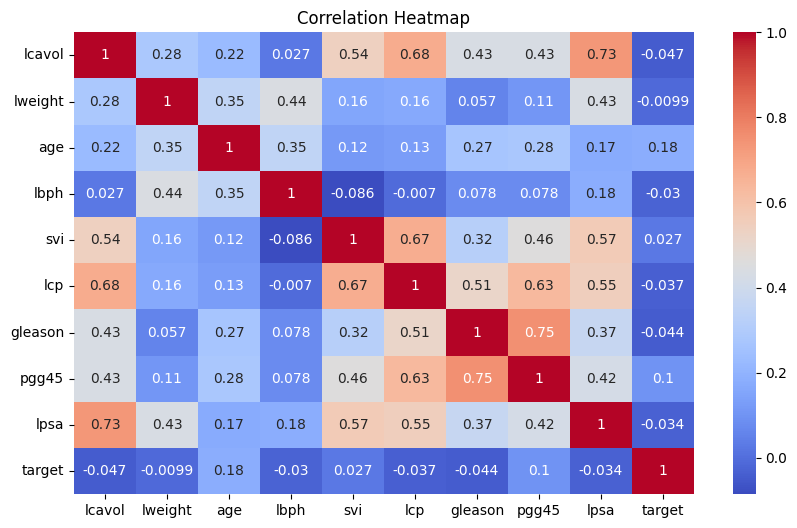

In [1006]:
# Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

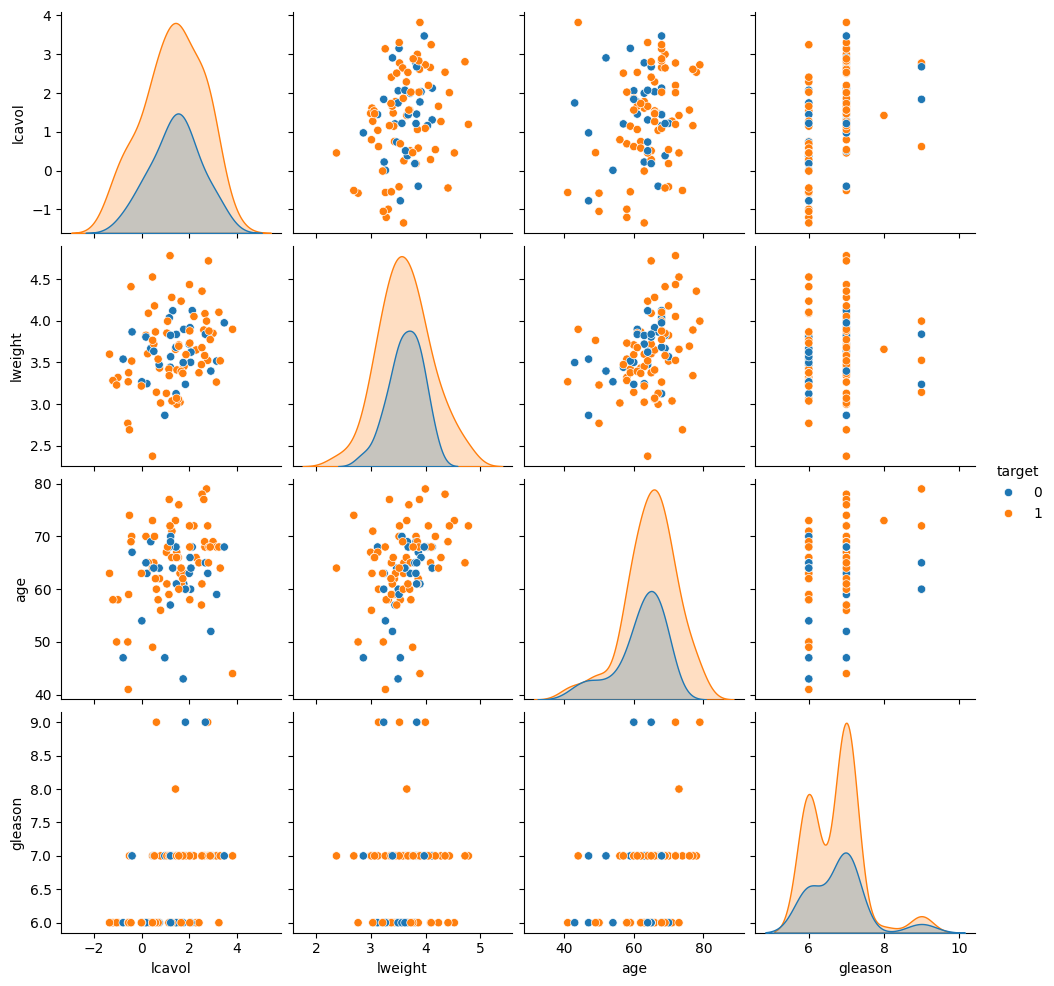

In [1007]:
sns.pairplot(df,vars=["lcavol","lweight",'age','gleason'], hue="target")
plt.show()

## **Train-Test Split**

In [1008]:
X = df.drop('target', axis=1)
y = df['target']

In [1009]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

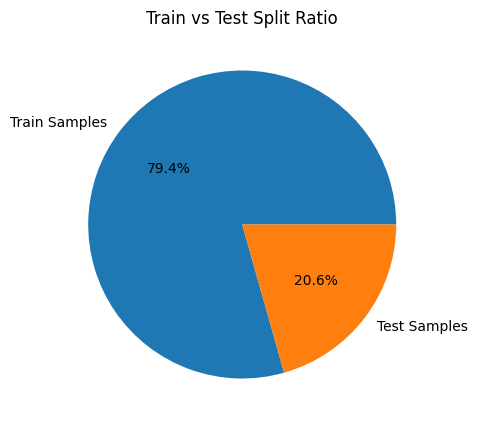

In [1010]:
plt.figure(figsize=(5,5))
sizes = [len(X_train), len(X_test)]
labels = ['Train Samples', 'Test Samples']

plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title("Train vs Test Split Ratio")
plt.show()


## **Feature Scaling**

In [1011]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# **Building the model**

In [1012]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),    # First layer
    Dropout(0.2),                                                      # Dropout to prevent overfitting
    Dense(64, activation='relu'),                                      # Second layer
    Dropout(0.2),                                                      # Dropout
    Dense(32, activation='relu'),                                      # Third layer
    Dropout(0.1),                                                      # Light dropout
    Dense(1, activation='sigmoid')                                     # Output (binary)
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## **Compile the model**

In [1013]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

## **Train the model**

In [1014]:
early_stop = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True) #EarlyStopping helps prevent overfitting

history = model.fit(X_train, y_train,epochs=40,batch_size=16,validation_split=0.2,callbacks=[early_stop],verbose=1)

Epoch 1/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step - accuracy: 0.5787 - loss: 0.6832 - val_accuracy: 0.8125 - val_loss: 0.6213
Epoch 2/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.6215 - loss: 0.6412 - val_accuracy: 0.8125 - val_loss: 0.5978
Epoch 3/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6037 - loss: 0.6526 - val_accuracy: 0.8125 - val_loss: 0.5842
Epoch 4/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6685 - loss: 0.6501 - val_accuracy: 0.8125 - val_loss: 0.5643
Epoch 5/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.6516 - loss: 0.6076 - val_accuracy: 0.8125 - val_loss: 0.5451
Epoch 6/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.6099 - loss: 0.6351 - val_accuracy: 0.8125 - val_loss: 0.5299
Epoch 7/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - accuracy: 0.6456 - loss: 0.6090 - val_accuracy: 0.8125 - val_loss: 0.5143
Epoch 8/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 109ms/step - accuracy: 0.6224 - loss: 0.6026 - val_accuracy: 0.8125 - val_loss: 0.503

# **Evaluate the Model on Test Data**

In [1015]:
# Evaluate model on unseen test data
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)

print("Test Accuracy:", test_accuracy)
print("Test Loss:", test_loss)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 458ms/step - accuracy: 0.7500 - loss: 0.6806
Test Accuracy: 0.75
Test Loss: 0.6805676221847534


## **Accuracy and Loss Curves**

**Accuracy Curve**

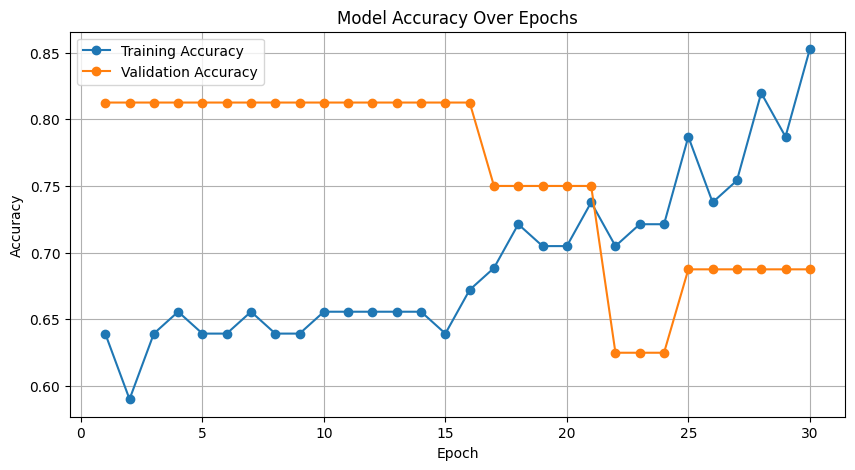

In [1016]:
plt.figure(figsize=(10, 5))
epochs = range(1, len(history.history['accuracy']) + 1)
plt.plot(epochs, history.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(epochs, history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

## **Loss Curve**

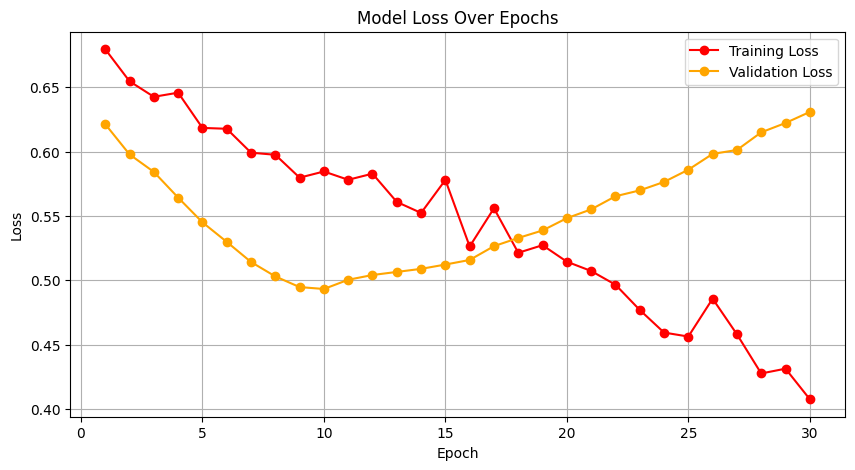

In [1017]:
plt.figure(figsize=(10, 5))
epochs = range(1, len(history.history['loss']) + 1)
plt.plot(epochs, history.history['loss'], label='Training Loss', marker='o', color='red')
plt.plot(epochs, history.history['val_loss'], label='Validation Loss', marker='o', color='orange')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

## **Conclusion**

Overall, this project shows that a neural network can help predict prostate cancer severity using simple medical measurements. Even though we used a small dataset, the model still reached about 75% accuracy, which means it is able to correctly classify many patient cases. This proves that machine learning can support doctors by giving early insights, but the results can become even better if we use a larger dataset, balance the classes, or test more advanced models. In short, this project is a good starting point for using AI in prostate cancer prediction, and there is clear potential for improvement in future work.